In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hasinduvindana/Education-Recomendation-System/main/datasets/student-scores.csv')
data.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [3]:
data = data.drop(['id', 'first_name', 'last_name','email','gender','part_time_job','absence_days','extracurricular_activities','weekly_self_study_hours',], axis=1)
data.head()

,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,Lawyer,73,81,93,97,63,80,87
1,Doctor,90,86,96,100,90,88,90
2,Government Officer,81,97,95,96,65,77,94
3,Artist,71,74,88,80,89,63,86
4,Unknown,84,77,65,65,80,74,76


In [4]:
data.shape

(2000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   career_aspiration  2000 non-null   object
 1   math_score         2000 non-null   int64 
 2   history_score      2000 non-null   int64 
 3   physics_score      2000 non-null   int64 
 4   chemistry_score    2000 non-null   int64 
 5   biology_score      2000 non-null   int64 
 6   english_score      2000 non-null   int64 
 7   geography_score    2000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 125.1+ KB


## Distribution Of Data Set

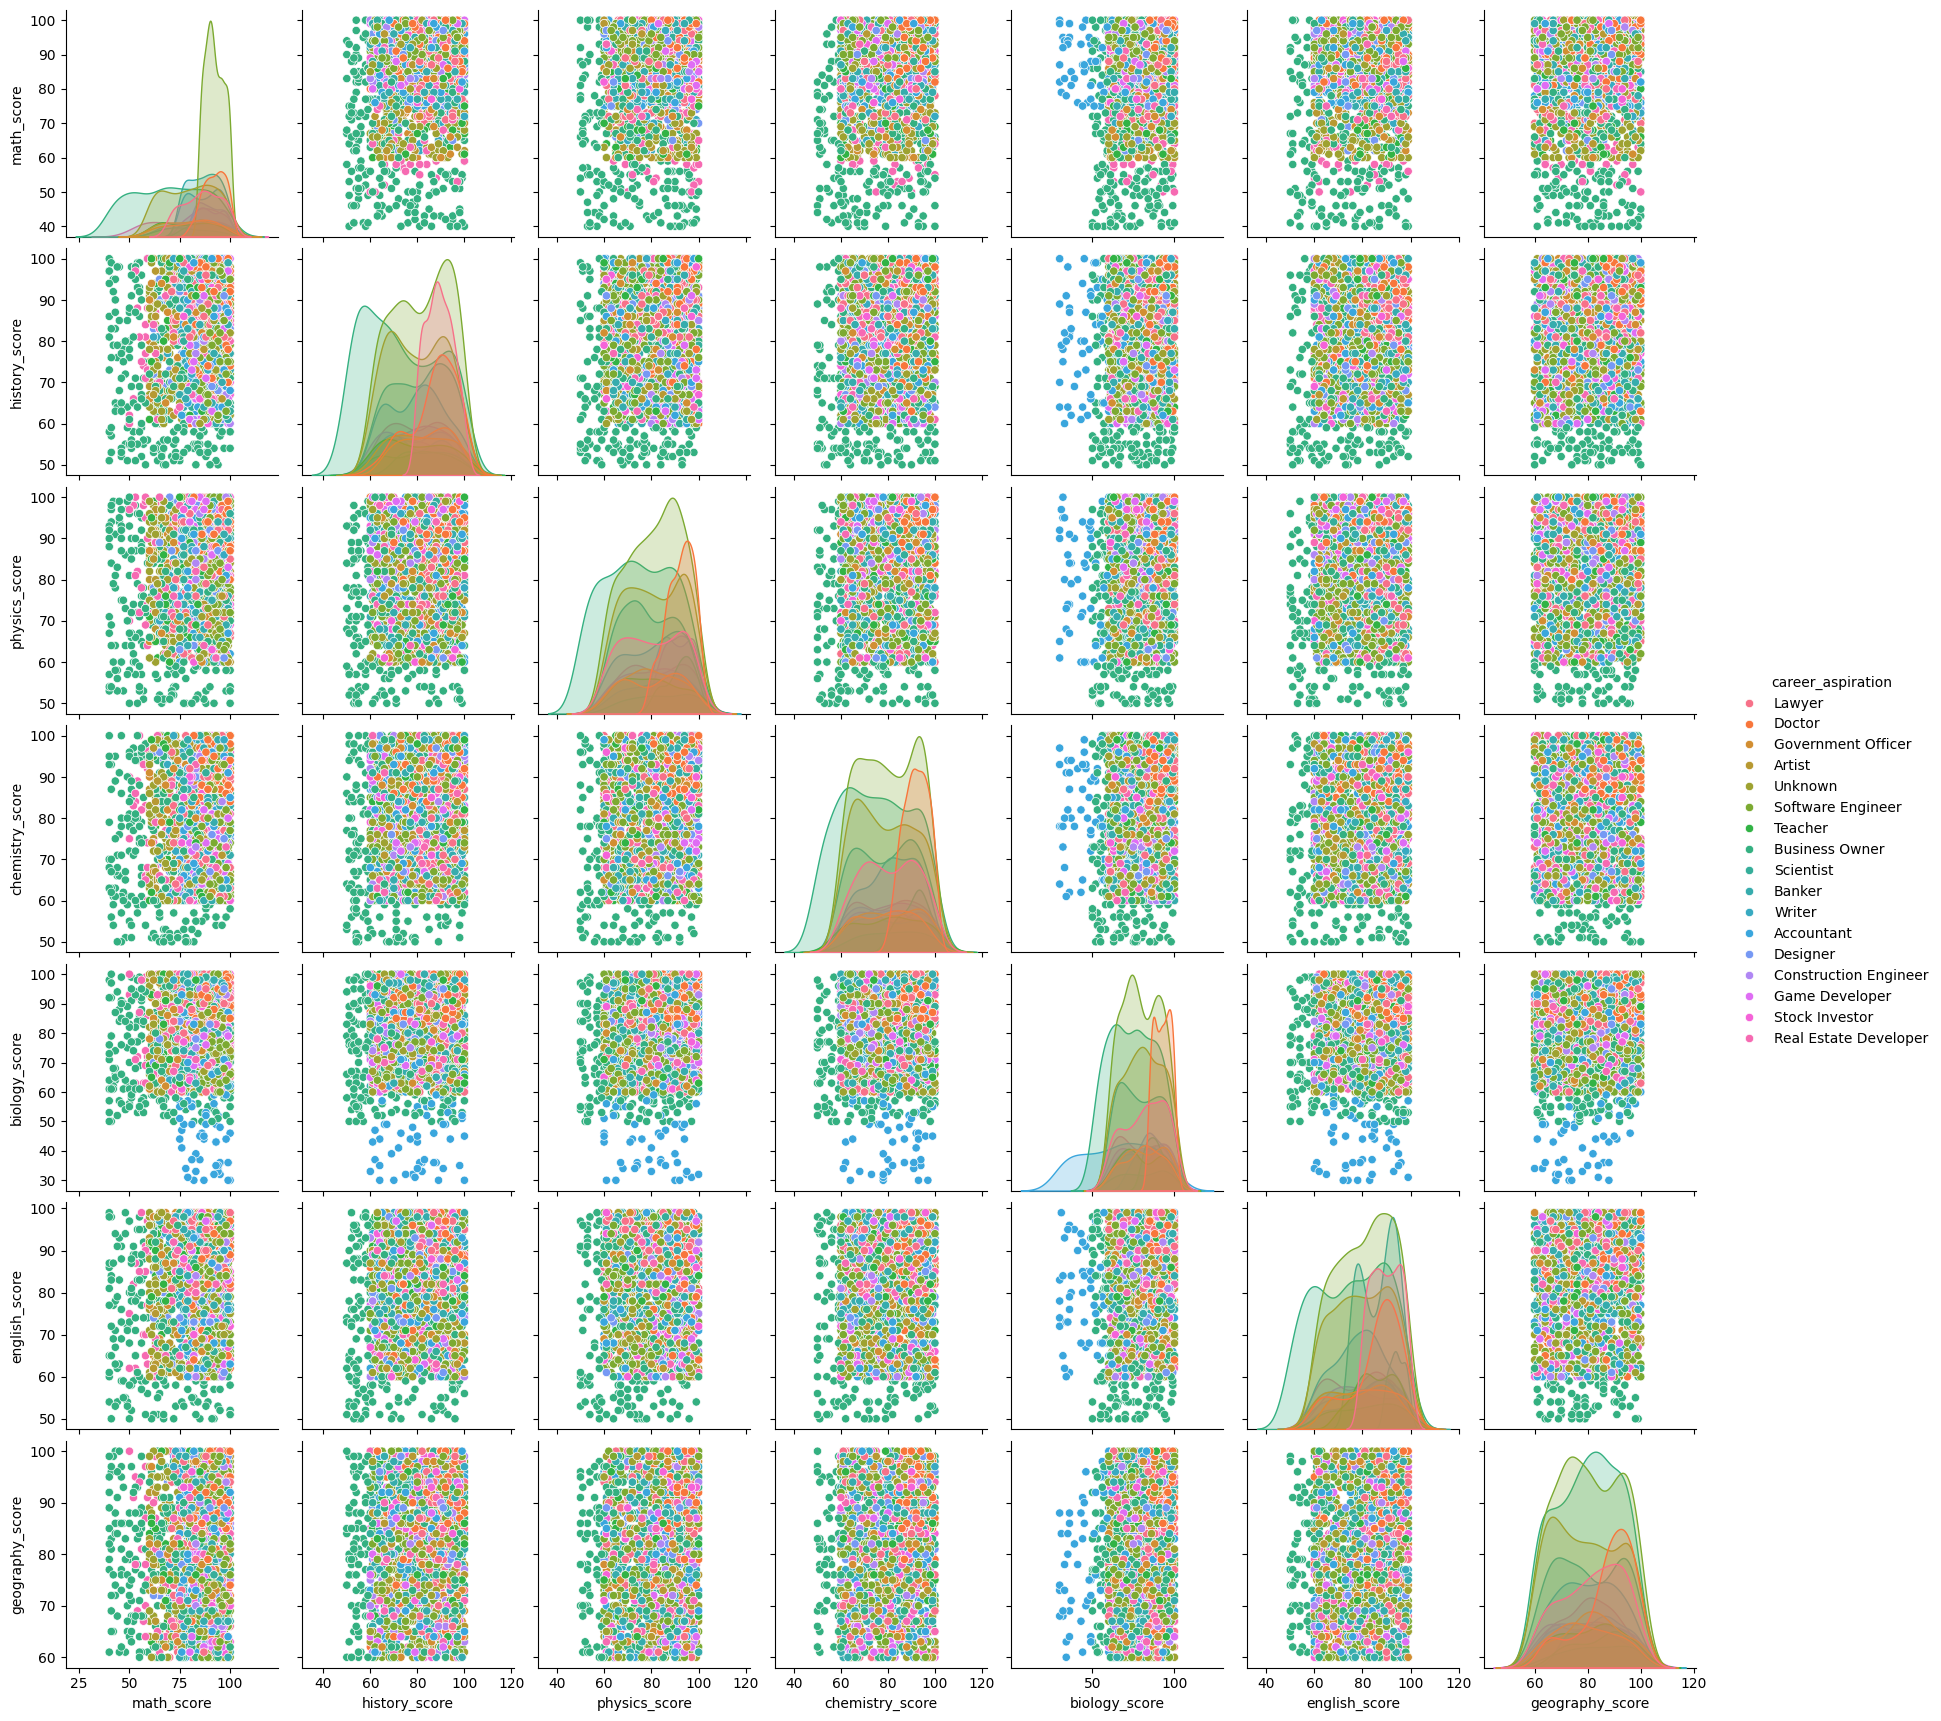

In [7]:
import seaborn as sns
sns.pairplot(data, hue='career_aspiration')

## Count Of Data Set


<Axes: xlabel='career_aspiration', ylabel='count'>

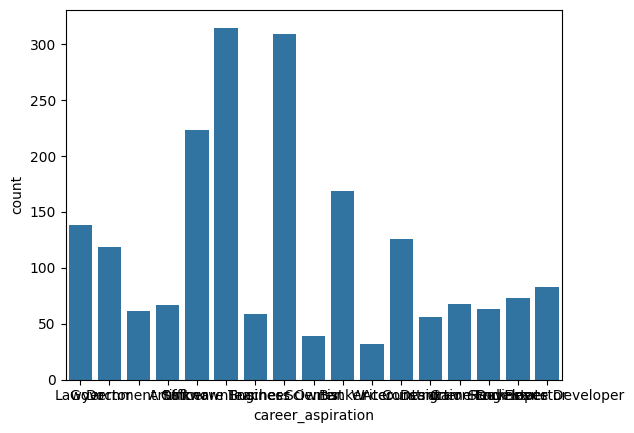

In [8]:
sns.countplot(x='career_aspiration', data=data)

In [9]:
x = data.drop('career_aspiration', axis=1)
x.head()

,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,73,81,93,97,63,80,87
1,90,86,96,100,90,88,90
2,81,97,95,96,65,77,94
3,71,74,88,80,89,63,86
4,84,77,65,65,80,74,76


In [10]:
y = data["career_aspiration"]
y.head()

0                Lawyer
1                Doctor
2    Government Officer
3                Artist
4               Unknown
Name: career_aspiration, dtype: object

In [11]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [12]:
x_train.shape

(1400, 7)

In [13]:
x_test.shape

(600, 7)

## Train Data with GAUSSIA

In [14]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [15]:
predict = NB.predict(x_test)
predict

array(['Scientist', 'Software Engineer', 'Doctor', 'Accountant',
       'Software Engineer', 'Doctor', 'Doctor', 'Doctor',
       'Software Engineer', 'Software Engineer', 'Accountant',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Banker', 'Business Owner', 'Doctor', 'Software Engineer',
       'Lawyer', 'Construction Engineer', 'Software Engineer', 'Writer',
       'Banker', 'Software Engineer', 'Business Owner',
       'Software Engineer', 'Business Owner', 'Software Engineer',
       'Banker', 'Doctor', 'Business Owner', 'Software Engineer',
       'Business Owner', 'Lawyer', 'Unknown', 'Business Owner', 'Lawyer',
       'Software Engineer', 'Business Owner', 'Lawyer',
       'Software Engineer', 'Banker', 'Software Engineer', 'Lawyer',
       'Unknown', 'Unknown', 'Doctor', 'Software Engineer', 'Lawyer',
       'Game Developer', 'Doctor', 'Business Owner', 'Doctor', 'Unknown',
       'Lawyer', 'Lawyer', 'Business Owner', 'Software Engineer',
       

In [16]:
y_test

1870                Scientist
1405                  Teacher
1508    Construction Engineer
1018               Accountant
804         Software Engineer
                ...          
476            Stock Investor
1466                   Doctor
439     Construction Engineer
1787        Software Engineer
778         Software Engineer
Name: career_aspiration, Length: 600, dtype: object

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
accuracy

0.3433333333333333

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
cm

array([[15,  0,  0,  4,  0,  0,  6,  0,  0,  3,  0,  0, 13,  0,  0,  4,
         0],
       [ 0,  0,  3,  5,  0,  0,  0,  0,  0,  4,  0,  1,  3,  0,  0,  6,
         0],
       [ 1,  0,  9,  2,  0,  0,  4,  0,  0, 12,  0,  2, 19,  0,  0,  4,
         1],
       [ 0,  0,  0, 59,  0,  1,  1,  0,  0,  2,  0,  0, 16,  0,  0,  7,
         0],
       [ 0,  0,  2,  0,  1,  0,  4,  1,  0,  2,  0,  1, 10,  0,  0,  1,
         0],
       [ 0,  0,  1,  2,  0,  0,  1,  1,  0,  1,  0,  0,  5,  0,  0,  2,
         1],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  2,  0,  3,  6,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  1,  7,  0,  0,  1,
         0],
       [ 0,  0,  0,  5,  0,  0,  1,  0,  0,  3,  0,  1,  3,  0,  0,  3,
         0],
       [ 0,  0,  2,  2,  0,  0,  5,  0,  0, 19,  0,  1,  7,  0,  0,  5,
         1],
       [ 0,  0,  2, 10,  0,  0,  0,  0,  0,  4,  0,  0, 12,  0,  0,  4,
         1],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  4,  4,  0,  

## Train Data with BERNOULLI

In [19]:
from sklearn.naive_bayes import BernoulliNB
modelBNB = BernoulliNB()
modelBNB.fit(x_train, y_train)

BernoulliNB()

In [20]:
predictB = modelBNB.predict(x_test)
predictB

array(['Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Eng

In [21]:
y_test

1870                Scientist
1405                  Teacher
1508    Construction Engineer
1018               Accountant
804         Software Engineer
                ...          
476            Stock Investor
1466                   Doctor
439     Construction Engineer
1787        Software Engineer
778         Software Engineer
Name: career_aspiration, Length: 600, dtype: object

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictB)
accuracy

0.14166666666666666